# Cheatsheets
https://wch.github.io/latexsheet/ - Latex

# Notebook Link
http://nbviewer.jupyter.org/github/Felkin1/Nonlinear-Dynamic-Systems-Labworks/blob/master/Assignment%20%232.ipynb

# Initial programming environment preparations

In [165]:
import numpy as np
from sympy import dsolve, Eq, symbols, Function
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.core.display import HTML
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import ArtistAnimation
from scipy.integrate import odeint
import math

In [2]:
%matplotlib inline
rc('animation', html='jshtml')
#rcParams['figure.figsize'] = 10, 5
HTML("""
<style>
.animation {
    display: table-cell;
    vertical-align: left;
    align: left;
}
</style>
""")

In [318]:
def init_fig():
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=2)
    #plt.close(fig)
    return fig,ax,line

def init_fig_3d():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    line, = ax.plot([], [], [], lw=3)
    return fig,ax,line

def init():
    line, = ax.plot([], [], lw=2)
    line.set_data([], [])
    return (line,)

def init_multi():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(func,frames,interval):    
    plt.close(fig)
    return animation.FuncAnimation(fig, func, init_func=init,
                                       frames=frames, interval=interval, 
                                       blit=True)
    
def set_figure(ax,xlim,ylim,xlabel,ylabel,title):
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [178]:
def newmark(f,t,m,h,k,x0):
    '''Newmark integrator
    x0 = [3 x 1] array where the index represents the order of integration
    example - x0[0] = x, x0[1] = x', x0[2] = x''
    '''
    x = np.zeros(3) # prepare array for new values
    x[2] = (f - (h*t/2 + k*t*t/4) * x0[2] - (h+k*t) * x0[1] - k*x0[0]) / (m + h*t/2 + k*t*t/4)
    x[1] = x0[1] + (x0[2]+x[2]) * t/2
    x[0] = x0[0] + x0[1]*t + (x0[2] + x[2]) * t*t/4

    return x

# Task 1
## Outline
Follow the Lindstedt’s method description in the lecture notes (in Moodle). Note, that the method is
illustrated for Duffing’s equation and all computations are limited to $x_1$. Try to make one step forward – collect
the terms at $e^{2}$, use the expression of $x_1$, identify secular terms, and derive the expression of $x_2$. Symbolic
algebra tools are highly recommended for the execution of the task. Try to visualize the derived solutions – do
not forget that the time scale is transformed.

# Task 2
## Outline
Hopf bifurcation. Try to simulate a “real world” problem – the Brusselator model. Yes, you will not find the
description of this model in our lecture notes – therefore this is a “real world” problem. Try to search the web
– find the description of the model, construct the code for simulation, illustrate Hopf bifurcation. Remember
that Newmark method will not work – you will not be able to transform a system of two first order ODEs into
one second order ODE. Suggestion – use Euler, Adams or even RK integration method. What??? No problems –
search the web. Yes, you will feel like immersed into a “real world” environment. BTW, you are not requested
to simulate the Brusselator as a reaction diffusion system in two spatial dimensions. Self-organizing patterns is
another topic which we will reach later in the course (assume now that the Brusselator model is described by a
system of two first order ODEs with constant coefficients). Discuss what type of Hopf bifurcation you are able
to observe using this model.

## Solution
We start off by defining the Brusselator model.
The Brusselator's chemical reactions are defined as:

$A −→ X$

$2X + Y −→ 3X$

$B + X −→ Y + C$

$X −→ D$

From this, we can derive two ODE's to model the system:

$\dot{x} = 1 − (b + 1)x + ax^2y$

$\dot{y} = bx − ax^2y$

We proceed by writing out the function that inputs $x,a,b$ and returns $\dot{x}$ and $\dot{y}$

An additional $t$ parameter is added to fit the coding convention for the plotting library of the programming language.

In [161]:
def brusselator(x,t,a,b):
    return [1 - (b+1)*x[0] + a*x[1]*x[0]**2, b*x[0] - a*x[1]*x[0]**2]

We continue by ploting the Brusselator model with a varying parameter $b$ and $a$ set to 1

In [307]:
x = []
for i in range(0,5):
    for j in range(0,6):
        x.append([i,j])

fig,ax,line = init_fig() 
timetext = ax.text(0,5.125,'')

lines = []
for i in x:
    lobj = ax.plot([],[],lw=2,color='r')[0]
    lines.append(lobj)

def animate(i,a):
    timetext.set_text(f"b: {round(i,2)}")
    for lnum,line in enumerate(lines):
        xs = odeint(brusselator, x[lnum], time,args=(a,i))
        line.set_data(xs[:, 0], xs[:, 1])
        
    return tuple(lines) + (timetext,)

b = np.arange(1, 3, 0.1)
a = 1
plt.close(fig)
anim = animation.FuncAnimation(fig, func=animate, fargs=(a,),init_func=init_multi,
                                       frames=b, interval=100, blit=True)

set_figure(ax,(0,4),(0,5),'x','y',"Brusselator model with b = 1..3 and a = 1")
anim

We identify that when the parameter $b$ reaches 2, the system develops a cycle

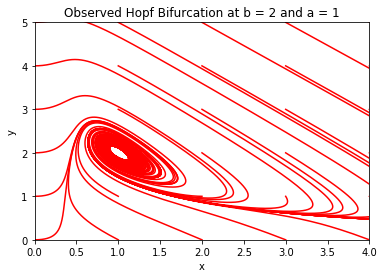

In [159]:
b = 2
a = 1
fig,ax,line = init_fig() 
for i in range(len(x)):
    xs = odeint(brusselator, x[i], time,args=(a,b))
    ax.plot(xs[:, 0], xs[:, 1],'r')
set_figure(ax,(0,4),(0,5),'x','y',"Observed Hopf Bifurcation at b = 2 and a = 1")
plt.show()

# Task 3
## Outline
Homoclinic bifurcation. Part 1. Remember the last task from Lab 1? It’s a high time to return to the same
problem. Try to carefully illustrate the homoclinic bifurcation in this system. Explain in your own words – what
happens when the homoclinic bifurcation occurs in this system. Part 2. Consider the following model:
$\frac{d^2 y}{dx^2} + A\frac{dy}{dx} + y = y^3 - y^2\frac{dy}{dx}$. 
Use numerical integration to identify the critical value of the parameter $A$ where
the homoclinic bifurcation occurs.

## Solution - Part 1

We are working with the damped oscillator described using the following equation:

$\frac{d^2 x}{dt^2} + h\frac{dx}{dt} + a \sin(x) = b$

$h > 0; a > 0; b > 0$

We may rewrite the equation as follows:

$mx'' + hx' + a\sin(x)=b$

In [358]:
def force(a,b,x):
    return b -a*np.sin(x[0])
    #return -a*np.sin(x[0])

def ddx0(a,b,h,point):
    return -h*point[1] + b - a*np.sin(point[0])
    #return -h*point[1] - a*np.sin(point[0])


In [359]:
def initial_points():
    '''Generate a 2 dimensional array for the points needed'''
    points = []
    r = 0.05
    npoints = 10
    dfi = 2*math.pi/npoints
    for x in range(0,npoints):
        x = dfi*x;
        points.append([r*np.cos(x),r*np.sin(x)])

    return points

def initial_points_2():
    '''Generate a 2 dimensional array for the points needed'''
    points = []
    r = 0.1;
    npoints = 10;
    dfi = 2*math.pi/npoints;
    for x in range(0,npoints):
        x = dfi*(x-1);
        points.append([r*np.cos(x),r*np.sin(x)])
    
    return points
def initial_points_3():
    '''Generate a 2 dimensional array for the points needed'''
    points = []
    r = 0.1;
    npoints = 10;
    dfi = 2*math.pi/npoints;
    for x in range(0,npoints):
        x = dfi*(x-1);
        points.append([np.pi+r*np.cos(x),r*np.sin(x)])
    
    return points

In [366]:
x = initial_points_2()
a,b = 1, 1
m,h,k = 1, 0.1, 0
iterations = 1000

fig,ax,line = init_fig() 
timetext = ax.text(0,5.125,'')

lines = []
for i in x:
    lobj = ax.plot([],[],lw=2,color='r')[0]
    lines.append(lobj)
    
# backwards pass
for i in x:
    lobj = ax.plot([],[],lw=2,color='b')[0]
    lines.append(lobj)
    

def animate(b,a,h):
    timetext.set_text(f"b: {round(b,2)}")
    # forward in time
    mid = int(len(lines)/2)
    for lnum,line in enumerate(lines[:mid]):
        point = x[lnum]
        xs = []
        xs.append([point[0],point[1],ddx0(a,b,h,point)])
        for j in range(iterations):
            f = force(a,b,xs[j])
            x_new = newmark(f,dt,m,h,k,xs[j])
            xs.append(x_new)
        xs = np.array(xs)
        line.set_data(xs[:, 0], xs[:, 1])
        
    # backwards in time  
    for lnum,line in enumerate(lines[mid:]):  
        point = x[lnum]
        xs = []
        xs.append([point[0],point[1],ddx0(a,b,h,point)])
        for j in range(iterations):
            f = force(a,b,xs[j])
            x_new = newmark(f,dt,m,-h,k,xs[j])
            x_new[1] = x_new[1]
            xs.append(x_new)
        xs = np.array(xs)
        line.set_data(xs[:, 0], -xs[:, 1])
        
    return tuple(lines) + (timetext,)

arg1 = np.arange(0.1, 2, 0.1)
arg2 = 0.3
arg3 = 0.1
plt.close(fig)
anim = animation.FuncAnimation(fig, func=animate, fargs=(arg2,arg3,),init_func=init_multi,
                                       frames=arg1, interval=100, blit=True)

set_figure(ax,(-1,10),(-10,10),'x','y',"")
anim

# Task 4
## Outline
The hysteresis effect (the forced Duffing oscillator).
The model reads: $\frac{d^2 x}{dt^2} + 0.1\frac{d^2 x}{dt} + x + \alpha x^3 = 0.5\cos(\omega t)$. Set $\alpha$ = 0.1. Illustrate the jump effect by slowly
varying $\omega$ starting from 0 to 2 – and then on the opposite – starting from 2 to 0. What does it mean “slowly
varying”? It means that you are requested to run computational simulations and vary $\omega$ so slowly that it would
not affect the transient processes. You could vary $\omega$ in every time step by a tiny fraction – so tiny that it does
not show a vivid impact to the transient processes. What you are requested to plot? – $\omega$ on the horizontal axis
– and the amplitude of t|he steady state oscillations on the vertical axis. Repeat the simulation at $\alpha$ = −0.1.

In [405]:
def force_3(a,x,w,t):
    return 0.5*np.cos(w*t) - a*x[0]**3

def ddx0_3(a,h,w,t,point):
    return -h*point[1] - point[0] + 0.5*np.cos(w*t) - a*point[0]**3

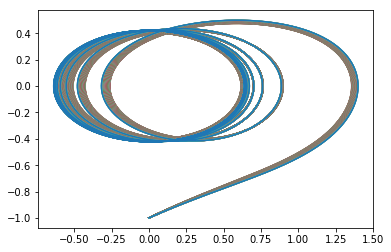

In [406]:
point = [0,1]
fig, ax = plt.subplots()
timetext = ax.text(0,5.125,'')


w_arr = np.arange(0, 2, 0.01)
a = 0.1
m,h,k = 1,0.1,0
t = 0
dt = 0.01
iterations = 10000
for h in h_arr:
    xs = []
    t = 0
    xs.append([point[0],point[1],ddx0_3(a,h,w,t,point)])    
    for j in range(iterations):
        f = force_3(a,xs[j],w,t)
        x_new = newmark(f,dt,m,h,k,xs[j])
        xs.append(x_new)
        t+=dt
    xs = np.array(xs)
    plt.plot(xs[:, 0], -xs[:, 1])

plt.show()

# Task 5
## Outline
Period doubling bifurcations and road to chaos in a forced mathematical pendulum.
This paradigmatic model reads: $\frac{d^2 x}{dt^2} + h \frac{dx}{dt} + \sin(x) = b\cos(\omega t)$. Set $\omega$ = 2/3; $b$ = 2.048 and illustrate the
bifurcation diagram by slowly varying $h$ from 1.05 to 1. What are you requested to plot? - $h$ on the horizontal
axis – and Poincare section points of $\frac{dx}{dt}$ on the vertical axis. Comment the results.

In [368]:
def force_2(b,x,w,t):
    return b*np.cos(w*t) -np.sin(x[0])

def ddx0_2(b,h,w,t,point):
    return -h*point[1] + b*np.cos(w*t) -np.sin(point[0])

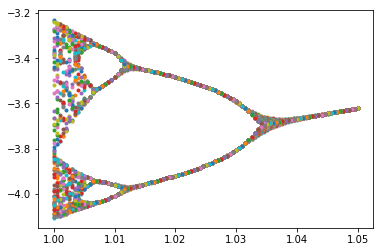

In [404]:
point = [0,1]
fig, ax = plt.subplots()
timetext = ax.text(0,5.125,'')


h_arr = np.arange(1.05, 1.00, -0.0005)
w=2/3
b = 2.048
m,k = 1, 0
t = 0
dt = 0.01
iterations = 80000
for h in h_arr:
    xs = []
    t = 0
    xs.append([point[0],point[1],ddx0_2(b,h,w,t,point)])    
    for j in range(iterations):
        f = force_2(b,xs[j],w,t)
        x_new = newmark(f,dt,m,h,k,xs[j])
        xs.append(x_new)
        if j > 15000 and x_new[1] > 0 and xs[j][1] < 0:
            plt.plot(h,(x_new[0]+xs[j][0])/2,'.')
        t+=dt

plt.show()


# Extras